In [63]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('Dependencies Imported')

Dependencies Imported


#### Importing data

In [64]:
data = pd.read_csv("Coursera.csv")

#### Feature Engineering

In [65]:
data=data[['Course Name','Difficulty Level','Course Rating','Course Description','Skills']]
data.head(5)

,Course Name,Difficulty Level,Course Rating,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Beginner,4.8,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Beginner,4.8,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,Advanced,4.1,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,Intermediate,4.8,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Beginner,4.6,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [66]:
data.shape

(3522, 5)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   Difficulty Level    3522 non-null   object
 2   Course Rating       3522 non-null   object
 3   Course Description  3522 non-null   object
 4   Skills              3522 non-null   object
dtypes: object(5)
memory usage: 137.7+ KB


In [68]:
data.isnull().sum()

Course Name           0
Difficulty Level      0
Course Rating         0
Course Description    0
Skills                0
dtype: int64

In [69]:
data['Difficulty Level'].value_counts()

Difficulty Level
Beginner          1444
Advanced          1005
Intermediate       837
Conversant         186
Not Calibrated      50
Name: count, dtype: int64

In [70]:
data['Course Name']

0       Write A Feature Length Screenplay For Film Or ...
1       Business Strategy: Business Model Canvas Analy...
2                           Silicon Thin Film Solar Cells
3                                    Finance for Managers
4            Retrieve Data using Single-Table SQL Queries
                              ...                        
3517    Capstone: Retrieving, Processing, and Visualiz...
3518                     Patrick Henry: Forgotten Founder
3519    Business intelligence and data analytics: Gene...
3520                                  Rigid Body Dynamics
3521    Architecting with Google Kubernetes Engine: Pr...
Name: Course Name, Length: 3522, dtype: object

In [71]:
# Convert course_rating columns to float
data['Course Rating'] = pd.to_numeric(data['Course Rating'], errors='coerce')


#### Exploratory Data Analysis

C:\Users\AkhilKumar\AppData\Local\Temp\ipykernel_1592\2266940243.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Difficulty Level', palette=['#26D4F0','#FF6196','#26D4F0','#71EAE1','#A16BDB'])


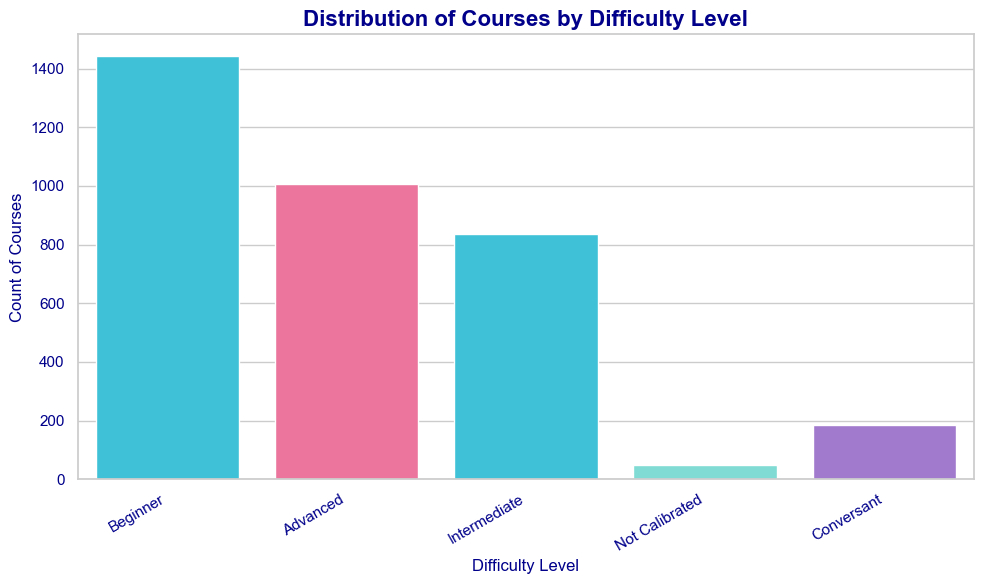

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size and style
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

# Create the countplot with the custom palette
sns.countplot(data=data, x='Difficulty Level', palette=['#26D4F0','#FF6196','#26D4F0','#71EAE1','#A16BDB'])

# Add title and labels with dark blue color
plt.title('Distribution of Courses by Difficulty Level', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Difficulty Level', fontsize=12, color='darkblue')
plt.ylabel('Count of Courses', fontsize=12, color='darkblue')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=30, ha='right', color='darkblue')

# Set y-tick label colors to dark blue
plt.yticks(color='darkblue')

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\AkhilKumar\AppData\Local\Temp\ipykernel_1592\3765773272.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating, x='Difficulty Level', y='Course Rating', palette=['#26D4F0','#FF6196','#26D4F0','#71EAE1','#A16BDB'])


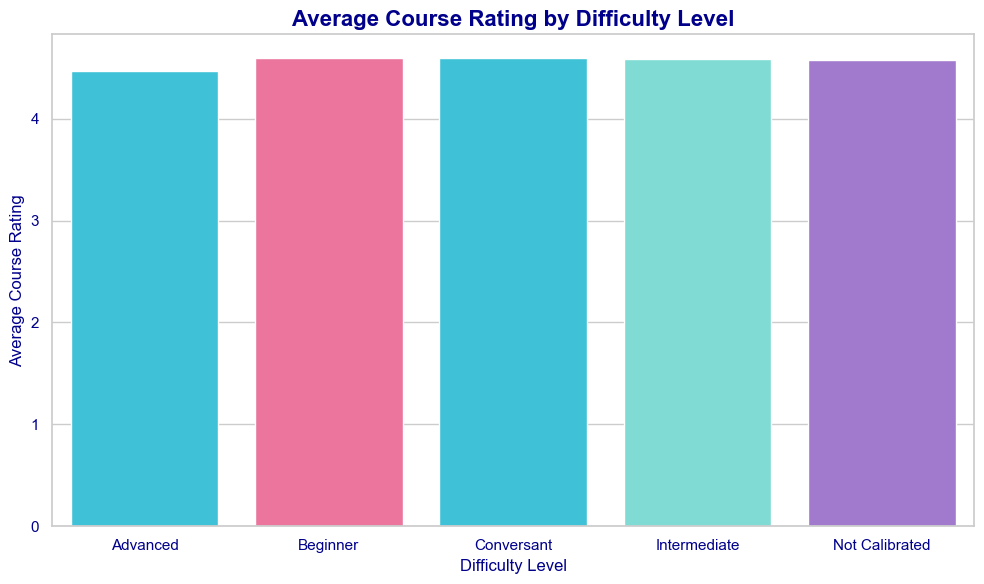

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by 'Difficulty Level' and calculate average 'Course Rating'
avg_rating = data.groupby('Difficulty Level')['Course Rating'].mean().reset_index()

# Set plot size and style
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

# Create the barplot with the magma palette
sns.barplot(data=avg_rating, x='Difficulty Level', y='Course Rating', palette=['#26D4F0','#FF6196','#26D4F0','#71EAE1','#A16BDB'])

# Add title and labels with dark blue color
plt.title('Average Course Rating by Difficulty Level', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Difficulty Level', fontsize=12, color='darkblue')
plt.ylabel('Average Course Rating', fontsize=12, color='darkblue')

# Set the y-ticks and x-ticks color to darkblue
plt.xticks(color='darkblue')
plt.yticks(color='darkblue')

# Show the plot
plt.tight_layout()
plt.show()


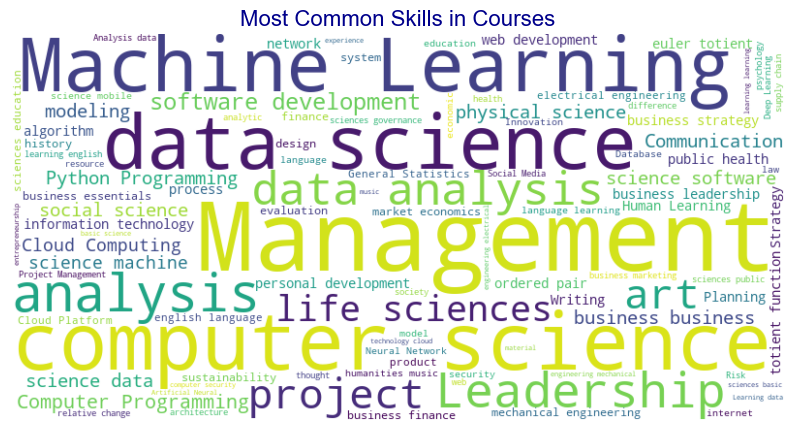

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the 'Skills' column into a single string
skills_text = ' '.join(data['Skills'].dropna())

# Generate the word cloud with custom parameters
wordcloud = WordCloud(
    background_color='white',  # Set background color
    width=800,  # Set word cloud width
    height=400,  # Set word cloud height
    max_words=100,  # Limit to top 100 words
    colormap='viridis',  # Apply a color map for words
    contour_color='black',  # Add contour/border color
    contour_width=1  # Set contour width
).generate(skills_text)

# Plot the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Most Common Skills in Courses', fontsize=16, color='darkblue')  # Add a title with dark blue color
plt.show()


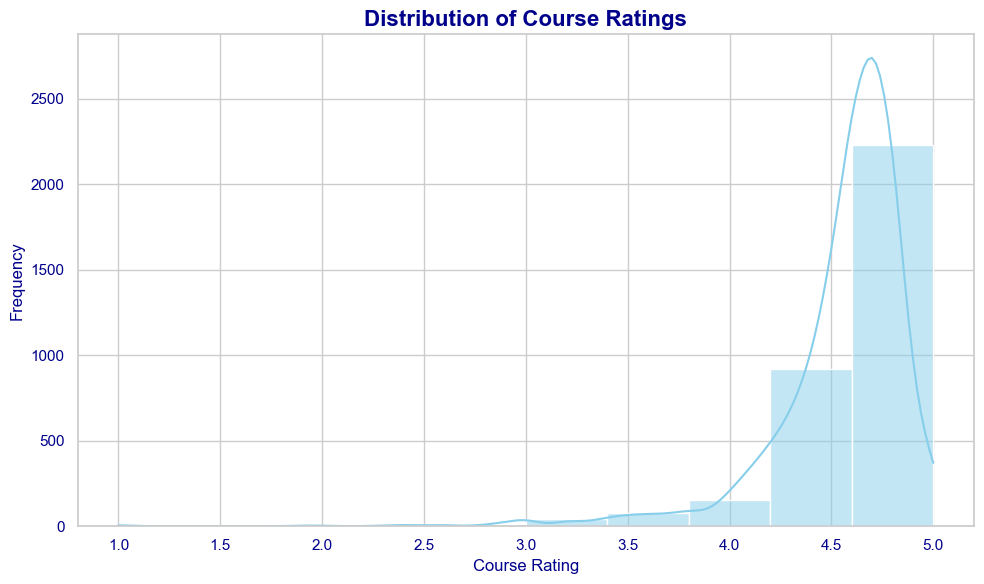

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size and style
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

# Create the histogram with kernel density estimation
sns.histplot(data['Course Rating'], bins=10, kde=True, color='skyblue')

# Add title and labels with dark blue color
plt.title('Distribution of Course Ratings', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Course Rating', fontsize=12, color='darkblue')
plt.ylabel('Frequency', fontsize=12, color='darkblue')

# Set the x and y ticks color to dark blue
plt.xticks(color='darkblue')
plt.yticks(color='darkblue')

# Show the plot
plt.tight_layout()
plt.show()


### Required Columns for System
#### Important columns to be used in recommendation system :

Course Name : Names of the courses

Course Description : Similar courses may have similar course description

Skills : Users may want to see courses based on same skills

Difficulty Level : Similar courses as per difficulty level


In [32]:
data = data[['Course Name','Difficulty Level','Course Description','Skills']]

In [33]:
data.head(5)

,Course Name,Difficulty Level,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Beginner,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Beginner,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,Advanced,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,Intermediate,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Beginner,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


#### Model Development

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Combine course name and description into a single text column for vectorization
data['combined'] = data['Course Name'] + ' ' + data['Course Description'] + ' ' + data['Skills']

# Initialize the TF-IDF Vectorizer to convert text data into numerical format
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the combined text data to create a TF-IDF matrix
X = tfidf_vectorizer.fit_transform(data['combined'])

# Initialize the Nearest Neighbors model
# n_neighbors specifies how many similar courses to recommend
model = NearestNeighbors(n_neighbors=3)  # Adjust neighbors as needed

# Fit the model with the TF-IDF matrix
model.fit(X)

def recommend_courses(course_name):
    """
    Recommend courses based on the input course name using Nearest Neighbors.

    Parameters:
    course_name (str): The name of the course for which recommendations are to be made.

    Returns:
    list: A list of recommended course names based on similarity.
    """
    # Transform the input course name into the TF-IDF format
    course_vector = tfidf_vectorizer.transform([course_name])

    # Find the nearest neighbors for the input course vector
    distances, indices = model.kneighbors(course_vector)

    # Extract recommended course names based on the indices of nearest neighbors
    recommended_courses = []
    for index in indices[0]:
        recommended_courses.append(data.iloc[index]['Course Name'])

    return recommended_courses

# Example usage
if __name__ == "__main__":
    # Define a course name to get recommendations for
    course_to_predict = 'HTML & CSS'

    # Get recommended courses based on the specified course
    recommendations = recommend_courses(course_to_predict)

    # Print the recommended courses
    print("Recommended Courses:", recommendations)


Recommended Courses: ['HTML and CSS: Building a Single-Page Website', 'Responsive Website Basics: Code with HTML, CSS, and JavaScript', 'Build Your Portfolio Website with HTML and CSS']


In [100]:
def evaluate_recommendations(test_courses, recommended_courses):
    """
    Evaluate the recommendations using precision and recall.

    Parameters:
    test_courses (list): The actual relevant courses that the user liked.
    recommended_courses (list): The courses recommended by the model.

    Returns:
    tuple: Precision and Recall scores.
    """
    # Convert the lists to sets for easy comparison
    true_set = set(test_courses)
    recommended_set = set(recommended_courses)

    # Calculate True Positives: Relevant courses that were recommended
    true_positives = len(true_set & recommended_set)

    # Precision: The ratio of true positives to the total number of recommended courses
    precision = true_positives / len(recommended_set) if recommended_set else 0

    # Recall: The ratio of true positives to the total number of actual relevant courses
    recall = true_positives / len(true_set) if true_set else 0

    return precision, recall

# Example usage
actual_courses = [
    'Python Basics', 
    'Python Programming Essentials', 
    'Python Data Representations'
]

# Get recommendations for a course (e.g., 'HTML & CSS')
predicted_courses = recommend_courses('Python')

# Print recommended courses
print("Recommended Courses:", predicted_courses)

# Evaluate the recommendations
precision, recall = evaluate_recommendations(actual_courses, predicted_courses)

# Print the precision and recall scores
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Optionally, calculate and print F1 score
def f1_score(precision, recall):
    """Calculate the F1 score from precision and recall."""
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

# Calculate F1 score
f1 = f1_score(precision, recall)
print(f"F1 Score: {f1:.2f}")

Recommended Courses: ['Python Data Analysis', 'Python Data Representations', 'Python Programming Essentials']
Precision: 0.67
Recall: 0.67
F1 Score: 0.67
